<a href="https://colab.research.google.com/github/Reshma-Sheik/Machine_Learning/blob/main/01_LinearRegression_ScikitLearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advertising media - Sales prediction

## Scikit-Learn


In [ ]:
# Get the data from VisionCog website

! wget https://www.visioncog.com/data/data.zip
! unzip data.zip

--2021-02-04 13:44:20--  https://www.visioncog.com/data/data.zip
Resolving www.visioncog.com (www.visioncog.com)... 103.21.58.10
Connecting to www.visioncog.com (www.visioncog.com)|103.21.58.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1569247 (1.5M) [application/zip]
Saving to: ‘data.zip’

data.zip            100%[===================>]   1.50M   987KB/s    in 1.6s    

2021-02-04 13:44:23 (987 KB/s) - ‘data.zip’ saved [1569247/1569247]

Archive:  data.zip
   creating: data/
  inflating: data/iris.csv           
  inflating: data/housing.csv        
  inflating: data/wdbc.csv           
  inflating: data/UnivariateData.csv  
  inflating: data/FAO.csv            
  inflating: data/tinyCovtype.csv    
  inflating: data/Advertising.csv    
  inflating: data/MultivariateData.csv  


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Read the CSV file into a Pandas DataFrame
df_AdvData = pd.read_csv('data/Advertising.csv')
print(df_AdvData.head())

# Take the features into 'X' and output into 'y'
X = df_AdvData[['TV', 'radio', 'newspaper']]

# X = df_AdvData['TV']
y = df_AdvData['sales']

   Unnamed: 0     TV  radio  newspaper  sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


In [ ]:
# Split it into 80% traiining and 20% testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42) # samples are taken based on row index values.

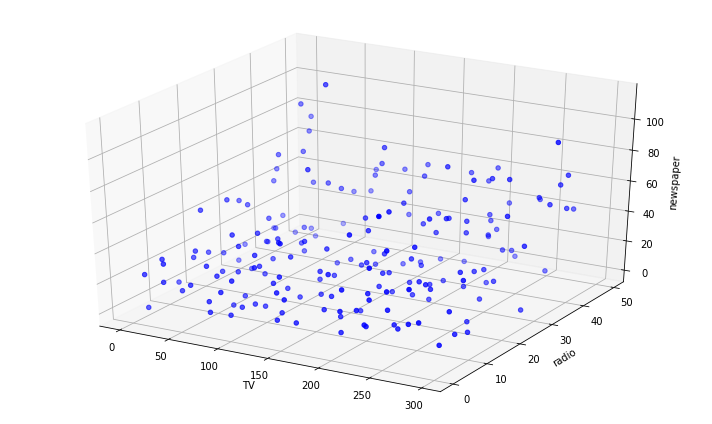

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')

ax.scatter(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2], color="b"); 
ax.set_xlabel("TV")
ax.set_ylabel("radio")
ax.set_zlabel("newspaper")

plt.tight_layout()
plt.show()

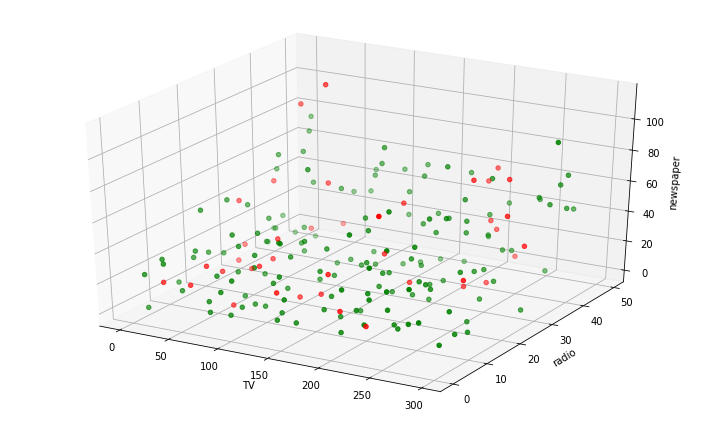

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')

ax.scatter(X_train.iloc[:,0], X_train.iloc[:,1], X_train.iloc[:,2], color="g"); 
ax.scatter(X_test.iloc[:,0], X_test.iloc[:,1], X_test.iloc[:,2], color="r"); 
ax.set_xlabel("TV")
ax.set_ylabel("radio")
ax.set_zlabel("newspaper")

plt.tight_layout()
plt.show()

In [ ]:
X_train = X_train.values
y_train = y_train.values

X_train = X_train.astype(np.float32)
y_train = y_train.astype(np.float32)

# Combine the operations
X_test = (X_test.values).astype(np.float32)
y_test = (y_test.values).astype(np.float32)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression

linearRegression = LinearRegression()

linearRegression.fit(X_train_std, y_train)

r2_Score = linearRegression.score(X_test_std, y_test)

print(r2_Score)

0.899437994930497


In [ ]:
# Print parameters

print(linearRegression.intercept_)
print(linearRegression.coef_)

14.1
[3.7641964  2.7923067  0.05597585]
